In [1]:
import pandas as pd
#dfClean = pd.read_csv('dirtydata_Semana5.csv')
dfClean = pd.read_csv('https://raw.githubusercontent.com/CharlesPrado23/Bootcamp2oSemestre2021/main/Semana6/data.csv')
dfClean

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [2]:
dfClean['Duration'].unique()

array([ 60,  45,  30,  80,  20, 210, 160, 180, 150, 300,  90, 120, 270,
        15,  25,  75])

In [3]:
#dfClean['Date'].str.match("'[0-9]{4}/[0-9]{2}/[0-9]{2}'")

In [4]:
#### Verifica se tem duplicatas no Dataframe ###3
dfClean[dfClean.duplicated()] #ele está mostrando só as repetições

,Duration,Pulse,Maxpulse,Calories
36,60,102,127,300.0
37,60,100,120,300.0
38,60,100,120,300.0
40,45,90,112,180.1
71,60,109,153,387.6
113,45,100,120,225.3
155,60,111,151,368.5


In [5]:
### Remove as duplicatas ####
dfClean.drop_duplicates(inplace=True)
dfClean.head(5)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [6]:
dfClean.duplicated().sum()

0

In [7]:
### Reset_index #### 
dfClean.reset_index(drop=True, inplace=True) #dropar a coluna de índice atual e gerar uma nova
dfClean.head(5)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [8]:
### Verifica se tem valores nulos na tabela ###
dfClean.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [9]:
type(dfClean)

pandas.core.frame.DataFrame

In [10]:
#porque o info deve vir antes do describe? para ter certeza que não temos dados faltantes 

In [11]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  162 non-null    int64  
 1   Pulse     162 non-null    int64  
 2   Maxpulse  162 non-null    int64  
 3   Calories  157 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.2 KB


#####temos 5 linhas em Calories faltando informação!

In [12]:
### Visualiza a coluna Calories #####
dfClean[dfClean["Calories"].isna()]

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
27,60,103,132,NaN
86,45,107,137,NaN
112,60,105,125,NaN
135,60,97,127,NaN


In [13]:
#dfClean.nunique()

In [14]:
#dfClean["Duration"].unique()

In [15]:
#dfClean["Calories"].mean()

#####Porque buscar a média? para ao invés de dropar as 5 linhas com a informação faltante, podemos "recuperar" essa informação.
Dados precisam ser tratados como petróleo...

In [16]:
#dfClean.describe()

#####Count - Número de contagem de observações não NA / nulas

Mean - média

Std - desvio padrão das observações

Min - valores mínimos

25%, 50% e 75% - o quanto seus dados, a partir da mediana, são pontos "fora da curva"

Max - valores máximos

In [17]:
#dfClean.corr() #o quanto linearmente são dependentes 2 variáveis

In [18]:
#avg_60_calories = dfClean[dfClean['Duration']==60].Calories.mean() # a média de calorias dos exercícios de 60 minutos
#avg_60_calories

In [19]:
#avg_45_calories = dfClean[dfClean['Duration']==45].Calories.mean() # a média de calorias dos exercícios de 45 minutos
#avg_45_calories

In [20]:
#dfClean[dfClean['Duration']==60]['Calories'].fillna(avg_60_calories, inplace=True) - eu gerei um novo data frame, não estou alterando o original

In [21]:
#dfClean['Calories'].fillna(373, inplace=True) - precisamos verificar exatamente o default do 'fillna' para saber o que será feito: nesse caso, preencheu os faltantes com 373

#####2ª opção de preenchimento:

In [22]:
#dfClean.loc[(dfClean.Duration==60) & (dfClean.Calories.isnull()), 'Calories']=avg_60_calories

In [23]:
#dfClean.loc[(dfClean.Duration==45) & (dfClean.Calories.isnull()), 'Calories']=avg_45_calories

In [24]:
#dfClean.isnull().sum() # para verificar se realmente não tem mais valores nulos

In [25]:
#dfClean[dfClean['Calories'] == avg_60_calories] # conferindo o preenchimento

In [26]:
#dfClean[dfClean['Calories'] == avg_45_calories] # conferindo o preenchimento

##### 3ª Opção de preenchimento

In [27]:
#### Substituir pela média ##### 
avg_45 = dfClean[dfClean.Duration==45].Calories.mean()
avg_45

277.7870967741935

In [28]:
avg_60 = dfClean[dfClean.Duration==60].Calories.mean()
avg_60

340.2704225352114

In [29]:
dfClean['Calories'] =  dfClean.groupby('Duration')['Calories'].apply(lambda x: x.fillna(round(x.mean(),1)))
dfClean['Calories'].head(20)

0     409.1
1     479.0
2     340.0
3     282.4
4     406.0
5     300.0
6     374.0
7     253.3
8     195.1
9     269.0
10    329.3
11    250.7
12    345.3
13    379.3
14    275.0
15    215.2
16    300.0
17    277.8
18    323.0
19    243.0
Name: Calories, dtype: float64

In [30]:
dfClean[dfClean.Calories.isnull()]

,Duration,Pulse,Maxpulse,Calories


In [31]:
dfClean.to_csv('dataClean.csv')

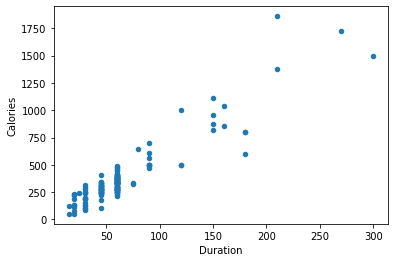

In [32]:
dfClean.plot(kind='scatter', x='Duration', y='Calories')

In [33]:
dfClean.describe()

,Duration,Pulse,Maxpulse,Calories
count,162.000000,162.000000,162.000000,162.000000
mean,64.197531,107.709877,134.265432,377.435802
std,43.151882,14.711588,16.471618,267.381758
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,255.075000
50%,60.000000,105.500000,131.000000,320.700000
75%,60.000000,111.000000,141.000000,386.700000
max,300.000000,159.000000,184.000000,1860.400000


In [34]:
dfClean.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.162098,0.003578,0.923190
Pulse,-0.162098,1.000000,0.787035,0.019257
Maxpulse,0.003578,0.787035,1.000000,0.197464
Calories,0.923190,0.019257,0.197464,1.000000


In [35]:
### P-Values
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dfClean['Duration'], dfClean['Calories'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9231899466412405  with a P-value of P = 2.4471846561133977e-68


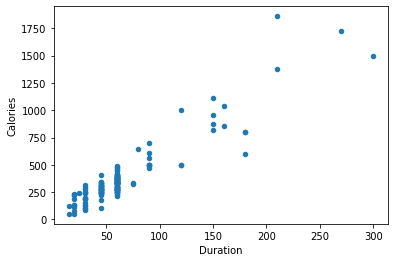

In [36]:
#### Visualizar Duration x Calories 
dfClean.plot(kind='scatter', x='Duration', y='Calories')

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
### Definir as Variáveis X e Y 
X = dfClean[['Duration']]
Y = dfClean[['Calories']]

In [40]:
### Acha a reta que melhor descreve a distribuição dos dados 
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

$$
Yhat=a+bX
$$

In [41]:
a = lr.intercept_
print(a)

[10.20304096]


In [42]:
b= lr.coef_
print(b)

[[5.72035648]]


In [43]:
dfClean.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [44]:
type(X)

pandas.core.frame.DataFrame

In [45]:
### Usa o modelo para predição #### 
Yhat = lr.predict(X)
Yhat[0:5]

array([[353.4244296 ],
       [353.4244296 ],
       [353.4244296 ],
       [267.61908244],
       [267.61908244]])

In [46]:
import numpy as np

In [47]:
Res = Y.values-Yhat

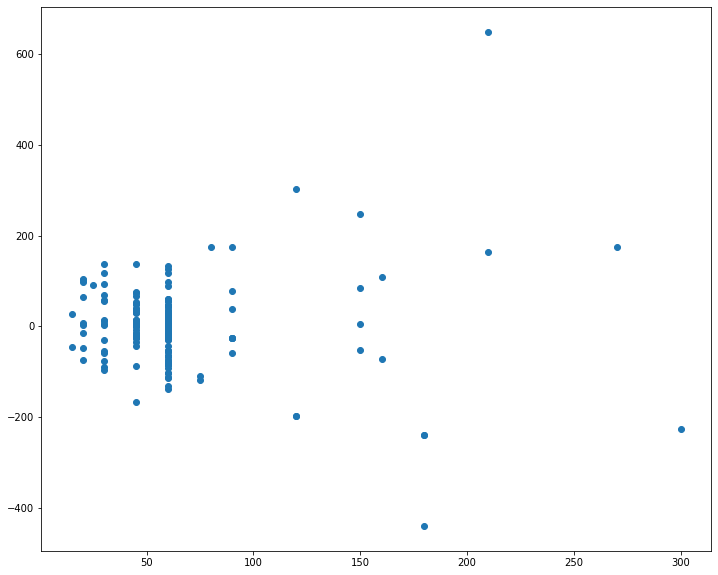

In [48]:
import matplotlib.pyplot as plt
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.scatter(X.values,Res)

In [49]:
### R-squared #####
print('The R-square is: ', lr.score(X, Y))

The R-square is:  0.8522796775794567


In [50]:
a=lr.score(X, Y)
type(a)

numpy.float64

In [51]:
coef_corr = np.sqrt(lr.score(X, Y))
coef_corr

0.9231899466412405

In [52]:
#### MSE - Mean Squared Error #### 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

The mean square error of Calories and predicted value is:  10495.778475396568


In [53]:
import seaborn as sns
%matplotlib inline 

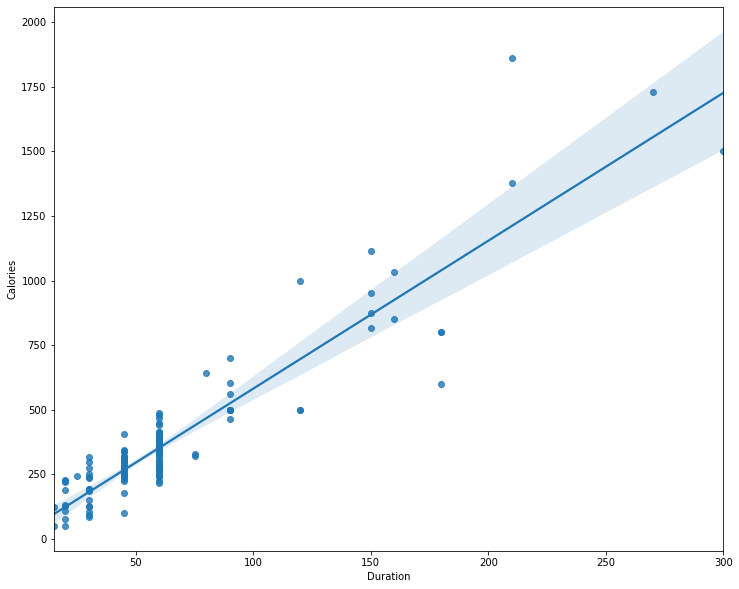

In [54]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Duration", y="Calories", data=dfClean)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


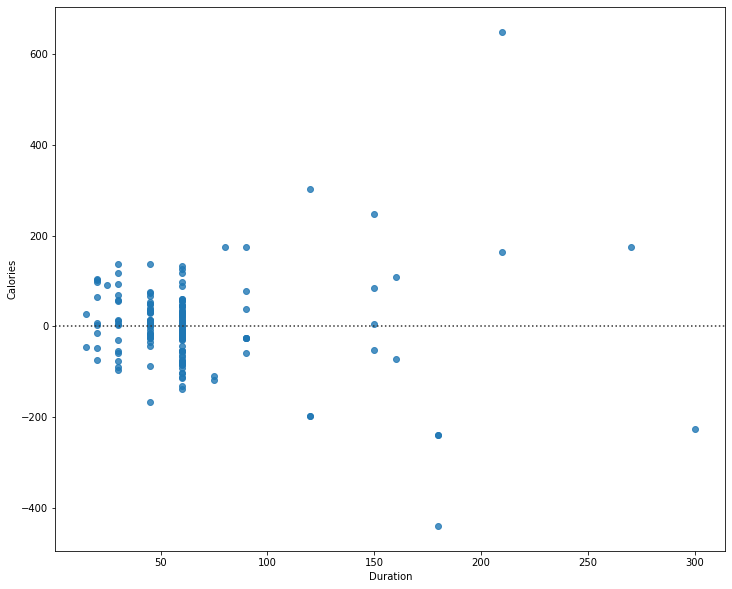

In [55]:
width = 12
height = 10
plt.figure(figsize=(width, height))
x =dfClean['Duration']
y = dfClean['Calories']
sns.residplot(x,y)
plt.show()

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [56]:
dfClean.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [57]:
Xm = dfClean[['Duration','Maxpulse']]
Y = dfClean[['Calories']]

lr.fit(Xm,Y)

Yhat = lr.predict(Xm)

### R-squared #####
print('The R-square is: ', lr.score(Xm, Y))

#### MSE - Mean Squared Error #### 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

The R-square is:  0.8899784772083568
The mean square error of Calories and predicted value is:  7817.215071189755


In [58]:
Res = Y.values-Yhat

Text(0, 0.5, 'Residual')

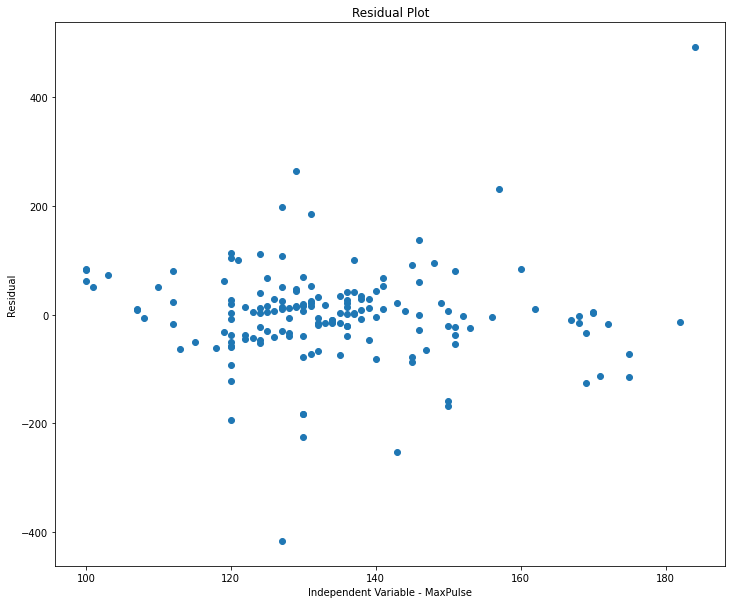

In [59]:
import matplotlib.pyplot as plt
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.scatter(Xm.Maxpulse.values,Res)
plt.title("Residual Plot")
plt.xlabel("Independent Variable - MaxPulse")
plt.ylabel("Residual")

Text(0, 0.5, 'Residual')

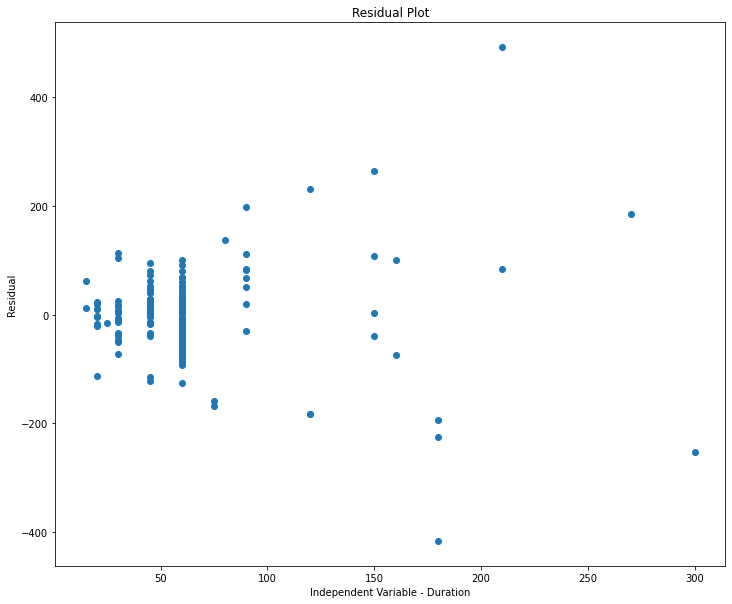

In [60]:
import matplotlib.pyplot as plt
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.scatter(Xm.Duration.values,Res)
plt.title("Residual Plot")
plt.xlabel("Independent Variable - Duration")
plt.ylabel("Residual")